# Comparative Analysis
In this notebook, we compare ClaSS with different configurations regarding runtime.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np

import pandas as pd

pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import sys

sys.path.append("../")

In [3]:
from src.utils import load_combined_dataset

In [4]:
df_comb = load_combined_dataset()
df_comb['ts_len'] = df_comb.time_series.apply(len)
# takes too much space
df_comb.drop("time_series", axis=1, inplace=True)
df_comb.head()

,name,window_size,change_points,ts_len
0,Adiac,10,"[572, 1012, 1232]",1408
1,ArrowHead,10,[753],1506
2,Beef,50,[705],1410
3,BeetleFly,10,[1280],2560
4,BirdChicken,20,[1280],2560


Let's load the scores from the different methods.

In [5]:
# sliding window runtimes
df_sw_runtimes = pd.read_csv("../experiments/sliding_window/runtimes.csv")
df_sw_throughput = pd.read_csv("../experiments/sliding_window/throughputs.csv")
df_sw_scores = pd.read_csv("../experiments/sliding_window/scores.csv")

# component runtimes
df_knn_runtimes = pd.read_csv("../experiments/components/knn_runtimes.csv")
df_knn_throughput = pd.read_csv("../experiments/components/knn_throughputs.csv")
df_scoring_runtimes = pd.read_csv("../experiments/components/scoring_runtimes.csv")
df_scoring_throughput = pd.read_csv("../experiments/components/scoring_throughputs.csv")

idx_sizes = np.argsort(df_comb.ts_len).to_numpy()
df_sw_throughput

,name,dataset,1000,2000,3000,4000,5000,6000,7000,8000,...,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000
0,UTSA,Cane,327.050173,2122.450277,4874.175087,3660.618192,3368.681357,3224.929794,3097.304069,2824.111780,...,2638.066209,2528.660520,2256.611364,2365.899152,2347.500396,2238.599492,2070.481678,1961.439711,1844.145529,1851.241961
1,UTSA,DutchFactory,597.985374,1873.894454,2946.617158,2607.130104,2396.177494,2206.723189,2120.193506,2095.020828,...,1926.366663,1846.964030,1787.732981,1739.536177,1678.686941,1629.153309,1586.126238,1528.156915,1465.331962,1391.923002
2,UTSA,EEGRat,145.913510,781.466735,6803.878211,4735.409021,4411.407901,4215.051951,4091.318223,3634.051058,...,3222.583868,3098.133375,2918.131812,2829.214469,2552.583214,2648.866285,2390.828781,2428.540204,2195.871761,2158.358784
3,UTSA,EEGRat2,137.600793,774.197544,6389.572218,4817.535830,4552.282970,4083.049221,3803.944691,3436.426117,...,3122.511748,3052.270126,2774.694784,2629.745046,2495.414676,2410.103152,2303.988204,2264.262020,2239.566420,2109.192917
4,UTSA,Fetal2013,1074.174109,3020.286256,3136.784726,2618.566509,2340.632205,2158.415723,2314.041087,2262.548661,...,2029.923325,1820.180339,1955.739443,1911.390080,1692.079189,1792.145028,1754.613415,1729.837780,1688.151521,1548.520303
5,UTSA,GrandMalSeizures,1124.671879,2863.948464,3446.973239,2944.084438,2539.199722,2057.011998,2001.218189,1841.382555,...,1678.997411,1654.236558,1649.878756,1548.056782,1532.707234,1517.338007,1457.402294,1430.965910,1406.942351,1328.769533
6,UTSA,GrandMalSeizures2,692.046802,1969.605437,3450.545380,2814.253345,2691.268918,2856.102582,2589.122855,2584.120772,...,2290.792039,2222.047103,1992.368920,2048.916331,1915.879784,1909.983798,1846.712098,1776.809679,1662.165930,1609.248591
7,UTSA,GreatBarbet1,333.100399,1469.075951,4570.695037,3836.891302,3743.588110,3479.960610,4065.321939,3003.981874,...,2636.287658,3047.278197,2554.486657,2321.205446,2277.573173,2206.883599,1996.135143,2055.156913,2028.870394,2034.403054
8,UTSA,GreatBarbet2,352.815505,1372.214696,3517.095328,3625.452217,3490.479161,3186.181463,3049.215638,2872.456806,...,2546.031712,2500.319190,2187.226597,2169.698089,2214.474180,2151.088817,1920.703550,1984.043227,1826.377555,1701.850310
9,UTSA,InsectEPG1,1079.908531,2523.504318,3126.580439,2534.591411,2336.197526,2239.333824,2118.795100,2063.796701,...,1837.175325,1885.532715,1787.370134,1818.002945,1758.123345,1724.160662,1678.643578,1644.796991,1579.013360,1541.441018


Let's calculate summary statistics.

In [6]:
np.round((df_sw_runtimes.iloc[:, 2:].sum(axis=0) / 60) / 60, 0)

1000      16.0
2000      25.0
3000      34.0
4000      44.0
5000      53.0
6000      63.0
7000      73.0
8000      82.0
9000      92.0
10000    101.0
11000    111.0
12000    121.0
13000    130.0
14000    139.0
15000    149.0
16000    159.0
17000    170.0
18000    179.0
19000    190.0
20000    198.0
dtype: float64

In [13]:
np.round(df_sw_scores.iloc[2:,].mean(), 3)

/var/folders/1m/8xt9fm8d1575s4p3vrgccf7r0000gn/T/ipykernel_3675/1917787252.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  np.round(df_sw_scores.iloc[2:,].mean(), 3)


1000     0.433
2000     0.504
3000     0.527
4000     0.540
5000     0.550
6000     0.554
7000     0.558
8000     0.561
9000     0.567
10000    0.568
11000    0.568
12000    0.571
13000    0.566
14000    0.567
15000    0.567
16000    0.564
17000    0.564
18000    0.565
19000    0.568
20000    0.571
dtype: float64

In [7]:
np.round(df_sw_throughput.iloc[:, 2:].mean(axis=0), 0)

1000     9016.0
2000     4698.0
3000     3611.0
4000     2979.0
5000     2548.0
6000     2237.0
7000     2028.0
8000     1838.0
9000     1698.0
10000    1575.0
11000    1472.0
12000    1369.0
13000    1286.0
14000    1209.0
15000    1137.0
16000    1074.0
17000    1015.0
18000     966.0
19000     912.0
20000     863.0
dtype: float64

In [12]:
np.round(df_sw_throughput.std(axis=0), 0)

/var/folders/1m/8xt9fm8d1575s4p3vrgccf7r0000gn/T/ipykernel_3675/1064832212.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  np.round(df_sw_throughput.std(axis=0), 0)


1000     4191.0
2000     1150.0
3000      813.0
4000      780.0
5000      742.0
6000      730.0
7000      736.0
8000      695.0
9000      706.0
10000     667.0
11000     660.0
12000     610.0
13000     577.0
14000     545.0
15000     512.0
16000     487.0
17000     458.0
18000     433.0
19000     409.0
20000     379.0
dtype: float64

In [8]:
np.round((df_knn_runtimes.iloc[:, 2:].sum(axis=0) / 60) / 60, 0)

default        36.0
knn-fft       212.0
knn-naive    2513.0
dtype: float64

In [9]:
np.round((df_scoring_runtimes.iloc[:, 2:].sum(axis=0) / 60) / 60, 0)

default            55.0
scoring-clasp    5755.0
dtype: float64

Let's plot sliding window size $d$ vs performance and throughput.

/var/folders/1m/8xt9fm8d1575s4p3vrgccf7r0000gn/T/ipykernel_2193/761910001.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax.plot(np.arange(1000, 20_000 + 1, 1000), df_sw_scores.iloc[2:,].mean())
/var/folders/1m/8xt9fm8d1575s4p3vrgccf7r0000gn/T/ipykernel_2193/761910001.py:15: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/1m/8xt9fm8d1575s4p3vrgccf7r0000gn/T/ipykernel_2193/761910001.py:18: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


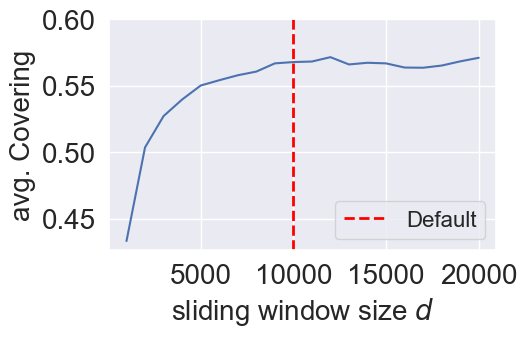

In [11]:
fontsize = 20
_, ax = plt.subplots(1, figsize=(5, 3))

# for competitor in df_throughput.columns[2:]:
    
ax.plot(np.arange(1000, 20_000 + 1, 1000), df_sw_scores.iloc[2:,].mean())
ax.axvline(x=10_000, linewidth=2, color='red', label=f'Default', linestyle="dashed")

ax.set_xlabel("sliding window size $d$", fontsize=fontsize)
ax.set_ylabel("avg. Covering", fontsize=fontsize)

ax.set_yticks(np.arange(0.45, 0.6 + 0.01, 0.05))

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

ax.legend(loc=4, prop={'size': fontsize - 4})
plt.savefig(f"../figures/covering_window.pdf", bbox_inches="tight")

/var/folders/1m/8xt9fm8d1575s4p3vrgccf7r0000gn/T/ipykernel_2193/1954339282.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax.plot(np.arange(1000, 20_000 + 1, 1000), df_sw_throughput.iloc[2:,].mean())
/var/folders/1m/8xt9fm8d1575s4p3vrgccf7r0000gn/T/ipykernel_2193/1954339282.py:14: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/1m/8xt9fm8d1575s4p3vrgccf7r0000gn/T/ipykernel_2193/1954339282.py:17: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


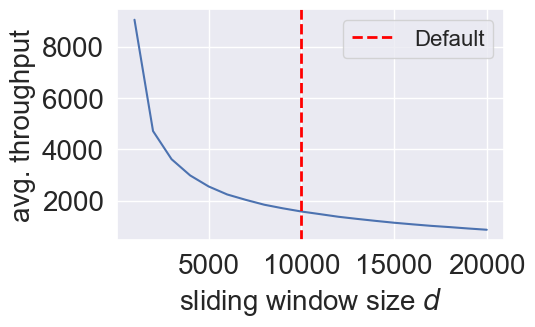

In [12]:
fontsize = 20

_, ax = plt.subplots(1, figsize=(5, 3))
    
ax.plot(np.arange(1000, 20_000 + 1, 1000), df_sw_throughput.iloc[2:,].mean())
ax.axvline(x=10_000, linewidth=2, color='red', label=f'Default', linestyle="dashed")

ax.set_xlabel("sliding window size $d$", fontsize=fontsize)
ax.set_ylabel("avg. throughput", fontsize=fontsize)

# ax.set_yticks(np.arange(0, 10_000 + 1_000, 2_000))

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)


ax.legend(loc=1, prop={'size': fontsize - 4})
plt.savefig(f"../figures/throughput_window.pdf", bbox_inches="tight")